# RMSE Diagnostics

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import pickle

from sklearn.metrics import mean_squared_error 

In [3]:
with open('experiment_hi.p', 'rb') as fp:
     hi = pickle.load(fp)

In [1]:
cases = ['MAT2',
         'MAT_05',
         'MAT_11',
         'MAT_unperturbed',
         'MAT_25',
         'MAT_26',
         'MAT_28',
         'MAT_vol_05',
         'MAT_vol_11',
         'MAT_vol_noerr',
         'MAT_vol_25',
         'MAT_vol_26',
         'MAT_vol_28',
 
         
         'ITD10_err15',
         'ITD_05',
         'ITD_11',
         'ITD_unperturbed',
         'ITD_25',
         'ITD_26',
         'ITD_28',
]

truths = ['TRUTH_05',
          'TRUTH_11',
          'TRUTH_25',
          'TRUTH_26',
          'TRUTH_28',
          
          'TRUTH_05',
          'TRUTH_11',
          'TRUTH_25',
          'TRUTH_26',
          'TRUTH_28'
         ]

members = ['05',
           '11',
           '24',
           '25',
           '26',
           '28']

In [7]:
number  =15
gridlines = np.linspace(70, 280, 15)
gridline = gridlines[int(((len(gridlines)-1)/2)-(number-1)/2) : int(((len(gridlines)-1)/2)+(number-1)/2)+1]
gridline = [int(x) for x in gridline]

RMSE_MAT = []
RMSE_ITD = []
RMSE_free= []



count = 0 

unpredicted = hi['FREE'].hi.sel(ni = gridline).sel(time=slice('2019-04-14','2019-04-16')).mean(dim = ['ni','nj'])


for mem in members: 
    
    if mem != '24':
        predicted_MAT = hi['MAT_vol_{00}'.format(mem)].hi.sel(ni = gridline).mean(dim=['ni','nj'])
#         predicted_ITD = hi['ITD_{00}'.format(mem)].hi.sel(ni = gridline).mean(dim=['ni','nj'])
        
        target = hi['TRUTH_{00}'.format(mem)].hi.sel(ni = gridline).sel(time=slice('2019-04-14','2019-04-16')).mean(dim=['ni','nj'])
        
        print(mem)
    else:
        predicted_MAT = hi['MAT_vol_noerr'].hi.sel(ni = gridline).sel(time=slice('2019-04-14','2019-04-16')).mean(dim=['ni','nj']) #MAT2
#         predicted_ITD = hi['ITD_unperturbed'].hi.sel(ni = gridline).mean(dim=['ni','nj']) #ITD10_err15'
        
        target = hi['TRUTH_24'].hi.sel(ni = gridline).sel(time=slice('2019-04-14','2019-04-16')).mean(dim=['ni','nj'])
        print(mem)

    
    rmse_MAT = xr.ufuncs.sqrt(mean_squared_error(target,  predicted_MAT))
#     rmse_ITD = xr.ufuncs.sqrt(mean_squared_error(target,  predicted_ITD))
    rmse_free = xr.ufuncs.sqrt(mean_squared_error(target, unpredicted))
    
    RMSE_MAT.append(rmse_MAT)
#     RMSE_ITD.append(rmse_ITD)
    RMSE_free.append(rmse_free)

05
11
24
25
26
28


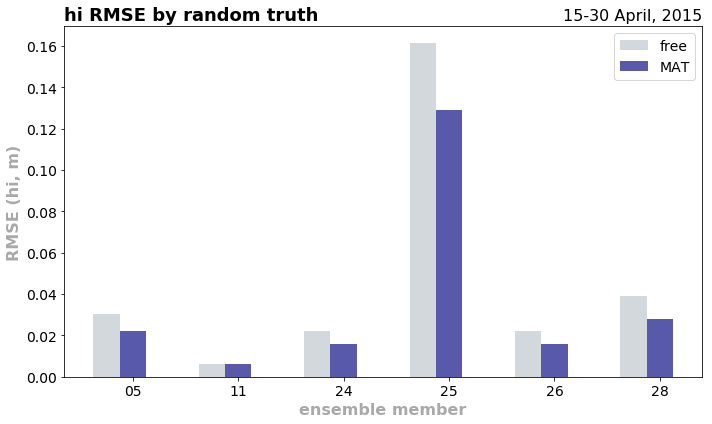

In [9]:
date = '15-30 April, 2015'

labels = ['05', '11', '24', '25', '26', '28']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects3 = ax.bar(x - 3*width/3, RMSE_free, width, label='free',color = 'slategray',alpha = 0.3)
rects1 = ax.bar(x, RMSE_MAT, width, label='MAT', color = 'navy', alpha = 0.65)
# rects2 = ax.bar(x + 3*width/3, RMSE_ITD, width, label='ITD', color = 'skyblue', alpha = 0.5 )

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')

ax.set_title('hi RMSE by random truth', 
             fontsize = 18, fontweight='bold', loc = 'left')
ax.set_title(date, fontsize = 16, loc='right')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14)
ax.set_xlabel('ensemble member', fontsize = 16, fontweight='bold', color = 'darkgrey')
ax.set_ylabel('RMSE (hi, m)', fontsize = 16, fontweight='bold',color = 'darkgrey')

# ax.set_ylim([0, 0.01])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()